In [1]:

student_id = raw_input('Please enter your NETID (e.g. ydubief)')
print(student_id)
assignment_name = 'HW1_'+student_id


Please enter your NETID (e.g. ydubief)ydubief
ydubief


The following cell should always be the first coding cell of your python notebooks

In [1]:
"""
importing the necessary libraries, do not modify
"""
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')


from IPython.display import display,Image, Latex

from IPython.display import clear_output

import SchemDraw as schem
import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }

from scipy.constants.constants import C2K
from scipy.constants.constants import K2C
from scipy.constants.constants import F2K
from scipy.constants.constants import K2F
from scipy.constants.constants import C2F
from scipy.constants.constants import F2C

<h3> Heat loss through a single-pane window</h3>

The rear window of an automobile is defogged by attaching a thin, transparent, film-type heating element to its inner surface. By electrically heating this element, a uniform heat flux may be established at the inner surface. 

(a)	For 4-mm-thick window glass, determine the electrical power required per unit window area to maintain an inner surface temperature of $15^\circ 􏰠C$ when the interior air temperature and convection coefficient are $T_{\infty.i}= 25^\circ 􏰠C$ and $h_i=10 W/m^2.K$, while the exterior (ambient) air temperature and convection coefficient are $T_{\infty.o}=􏰕-10^\circ 􏰠C$ and $h_o=65 W/m^2.K$.


The thermal conductivity of this glass is $1.4 W/m.K$


## Assumptions

Steady state, 1D conduction, thermal resistance of the heating element is negligible. Negligible heat transfer by radiation.

## Parameters

In [2]:
L =0.004 #m

k_glass = 1.4 #W/m.K thermal conductivity of glass

T_infi = 25 #C
T_info = -10 #C
h_i = 10.
h_o = 65.
T_si = 15 #C


In [3]:
from Libraries import HT_thermal_resistance as res #Loads up the class Resistance
?res.Resistance # If you forget how to use the Resistance class

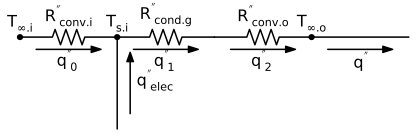

In [4]:

Rth = []  # Tells python that Rth will be an array
Rth.append(res.Resistance("$R''_{conv.i}$",'W/m^2')) # add the first element of the array
Rth.append(res.Resistance("$R''_{cond.g}$",'W/m^2')) # add the second element of the array
Rth.append(res.Resistance("$R''_{conv.o}$",'W/m^2')) # add the third element of the array

d = schem.Drawing() # start a sketch with name d
d.add( e.DOT, label='$T_{\infty.i}$') #add a dot to d to define the inside temperature
R0 = d.add( e.RES, d='right', label=Rth[0].name ) #add a resistance to the right of the dot (Rth[0])
d.labelI(R0,"$q''_0$",top = False) #add an arrow for the heat flux through the resistance
d.add( e.DOT, label='$T_{s.i}$') #add a dot for the temperature on the inside surface of the window
R1 = d.add( e.RES, d='right', label=Rth[1].name ) # add a resistance to the right of the dot (Rth[1])
d.labelI(R1,"$q''_1$", top = False) #add an arrow for the heat flux through the resistance

R2 = d.add( e.RES, d='right', label=Rth[2].name ) #add a resistance to right of the previous resistance (Rth[2])
d.labelI(R2,"$q''_2$", top = False) #add an arrow for the heat flux through the resistance
d.add( e.DOT, label='$T_{\infty.o}$') #add a dot for the temperature of the outside air
L1=d.add( e.LINE, d = 'right') #add a line to support an arrow for the heat flux q''
d.labelI(L1,"$q''$", top = False) #add an arrow for the heat loss to the outside air

L2 = d.add( e.LINE, d='down', endpts = [[3,-3],[3,0]]) #add a line to support an arrow for the heat flux q''_elec
# not that each element is 3 units long, hence the start and end coordinates of the line.
d.labelI(L2,"$q''_{elec}$", top = False)#add an arrow for the electrical power entering the system
d.draw()

<h2> Conservation of energy</h2>
$$
q''_0+q_{elec}= q''=q''_1=q''_2
$$

In [5]:
A = 1.
Rth[0].convection(h_i,A,"h_{c.i}","A","T_{\infty.i}","T_{s.i}")
Rth[1].conduction('plane',k_glass,L,0.,A,"k_{glass}","L","none","A","T_{s.i}","T_{s.o}")
Rth[2].convection(h_o,A,"h_{c.o}","A","T_{s.o}","T_{\infty.o}")
#Verification of equations:
for i in range(len(Rth)):
    print("Thermal element # %2i" %i)
    Rth[i].display_equation(i)

Thermal element #  0


       T_{\infty.i} - T_{s.i}
q''₀ = ──────────────────────
            R''_{conv.i}     

q''₀ = h_{c.i}⋅(T_{\infty.i} - T_{s.i})

Thermal element #  1


       T_{s.i} - T_{s.o}
q''₁ = ─────────────────
          R''_{cond.g}  

       k_{glass}⋅(T_{s.i} - T_{s.o})
q''₁ = ─────────────────────────────
                     L              

Thermal element #  2


       -T_{\infty.o} + T_{s.o}
q''₂ = ───────────────────────
             R''_{conv.o}     

q''₂ = h_{c.o}⋅(-T_{\infty.o} + T_{s.o})

<h2>Computation of heat fluxes $q''_0$ and $q''$</h2>

Conservation of energy dictates that $q''_1=q''_2=q''$ with
$$
q''=\frac{1}{R''_{1.2}}(T_{s.i}-T_{\infty.o})
$$
and 
$$R''_{1.2} = R''_{cond.g}+R''_{conv.o}$$

In [6]:
R_12 = res.serial_sum(Rth,1,2)
q = (T_si-T_info)/R_12
print('Heat loss on the outside: %4.0f W/m^2' %q)
q_0 = (T_infi-T_si)/Rth[0].R
print('q_0 heat flux: %4.0f W/m^2' %q_0)
q_elec = q - q_0
print('Electric heating power requirement: %4.0f W/m^2' %q_elec)

Heat loss on the outside: 1370 W/m^2
q_0 heat flux:  100 W/m^2
Electric heating power requirement: 1270 W/m^2


(b) In practice $T􏰝_{\infty.o}$ and $h_o$ vary according to weather conditions and car speed. For values of $h_o=2,20,65,100 W/m^2.K$, determine and plot the electrical power requirement as a function of $T􏰝_{\infty.o}$ for 􏰕$-30\leq􏰦 T􏰝_{\infty.o}\leq 0^\circ 􏰠C$. From your results, what can you conclude about the need for heater operation at low values of $h_o$? How is this conclusion affected by the value of $T􏰝_{\infty.o}$? If $h\propto V^n$, where $V$ is the vehicle speed and $n$ is a positive exponent, how does the vehicle speed affect the need for heater operation?

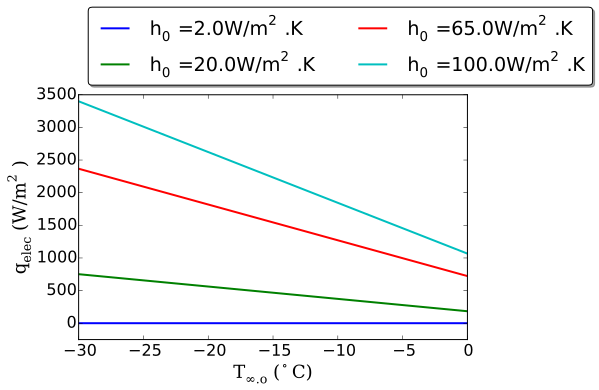

In [7]:
h_o_array = np.array([2., 20., 65., 100.])
NT = 100
T_info_array = np.linspace(-30.,0.,NT)
q_elec = np.zeros(NT)
for h_o in h_o_array:
    Rth[2].convection(h_o,A,"h_{c.o}","A","T_{s.o}","T_{\infty.o}")
    for i in range(NT):
        T_info = T_info_array[i]
        R_12 = res.serial_sum(Rth,1,2)
        q = (T_si-T_info)/R_12
        q_elec[i] = np.max([0.,q - q_0])
    plt.plot(T_info_array,q_elec, lw=2, label='$h_0=$'+str(h_o)+'$W/m^2.K$')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.xlabel('$T_{\infty.o}$ ($^\circ C$)', fontdict = font)
plt.ylabel('$q_{elec}$ ($W/m^2$)', fontdict = font)
plt.ylim(-250,3500)
plt.show()


<h2> Discussion</h2>
At the lowest convection heat transfer coefficient $h_o$, the heating of the car is sufficient to maintain the surface temperature at or above $T_{s.i}$. For larger $h_o$, lower ambient air temperatures increase the need for surface heating.

The graph shows that if $h_o$ increases with the car speed at a given temperature, the required power to maintain $T_{s.i}=15^\circ C$ will increase. 

# Homework Assignment 1

Using the library SchemDraw, reproduce the thermal circuits below. For all circuits you will use the following convention:
<ul>
<li> Label the thermal resistance \$R_{cond.n}\$, \$R_{cont.n}\$ \$R_{conv.n}\$, \$R_{rad.n}\$, for heat transfer by conduction, contact, convection and radiation, respectively. n is the number of the resistance or a distinctive name for the resistance (glass, wood, steel for conduction). </li>
<li> <b style="color:red"> ONLY USE . TO SEPARATE INDICES </b>. There is something in scipy allergic to $T_{s,i}$ (\$T_{s,i}\$). Write $T_{s.i}$ (\$T_{s.i}\$) instead.</li>
<li> Represent heat transfer flux e.LINE and d.LABELI as shown above. If the arrow is not pointed in the right direction, you will need to use endpts to change the start and end of the line.</li>
<li> Make sure that you use the appropriate heat transfer units in defining your thermal resistance (W, W/m, W/m^2), this affects your equations.</li>
<li> When in doubt, first search the documentation http://cdelker.bitbucket.org/SchemDraw/SchemDraw.html</li>
<li> It is recommended to define each constant: R0 = d.add( e.RES, d='right', label=Rth[0].name ). Here R0 is the name of the first resistance. It helps when you need to connect a vertical line at either end of the resistance using arguments xy, to, tox, toy.</li>
</ul>

<h2> PB 1</h2>

Here assume that $R_{t,b}$ is is convection and $R_{t,f(N)}$ is radiation. 

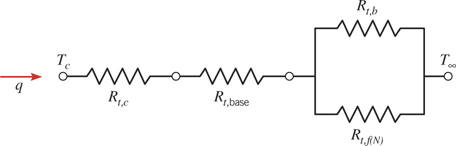

In [20]:
Image(filename='book-figures/boxun_03_28.jpg')

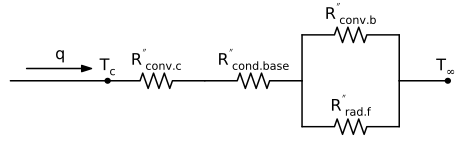

In [31]:
from Libraries import HT_thermal_resistance as res
Rth = []
Rth.append(res.Resistance("$R''_{conv.c}$",'W'))
Rth.append(res.Resistance("$R''_{cond.base}$",'W'))
Rth.append(res.Resistance("$R''_{conv.b}$",'W'))
Rth.append(res.Resistance("$R''_{rad.f}$",'W'))

d = schem.Drawing()
L1=d.add( e.LINE, d = 'right')
d.labelI(L1,'q')
d.add( e.DOT, label='$T_{c}$')
R0 = d.add( e.RES, d='right', label=Rth[0].name )
R1 = d.add( e.RES, d='right', label=Rth[1].name )
L0 = d.add( e.LINE, d = 'up', l = 1.5)
R2 = d.add( e.RES, d='right', label=Rth[2].name )
L1 = d.add( e.LINE, d = 'down', l = 1.5)
L2 = d.add( e.LINE, d = 'right', l = 1.5)
d.add(e.DOT, label = '$T_\infty$')
L3 = d.add( e.LINE, d = 'down', xy = R1.end, l = 1.5)
R3 = d.add( e.RES, d = 'right', label = Rth[3].name)
L4 = d.add( e.LINE, d = 'up', l = 1.5)
d.draw()

<h2> PB 2</h2>
Redraw the circuit below and write the conservation of energy

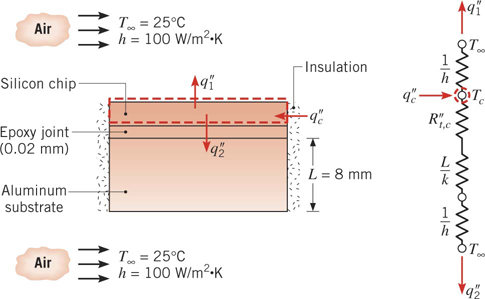

In [13]:
Image(filename='book-figures/boxun_03_04.jpg')

<h2> PB 3</h2>
Redraw the circuit below, do not include the irradiation arrows with labels x.xxGLw.

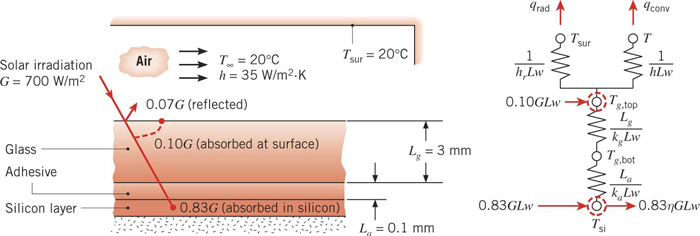

In [14]:
Image(filename='book-figures/boxun_03_07.jpg')

<h2> PB 4</h2>
Redraw the circuit (a) only. All resistances represent conduction heat transfer only.

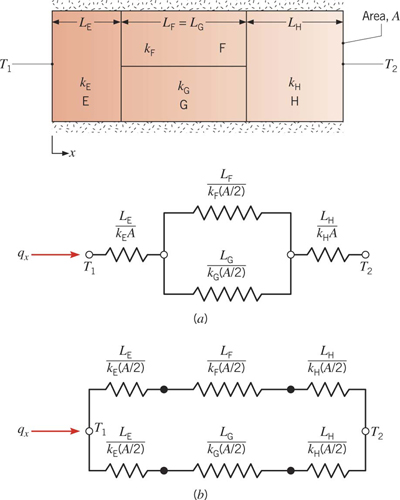

In [10]:
Image(filename='book-figures/fig_03_03.jpg')

<h2> PB 5</h2>
The circuits below represents models of porous materials. Explain the difference between (b) and (c) in terms of conservation of energy and redraw all circuits.

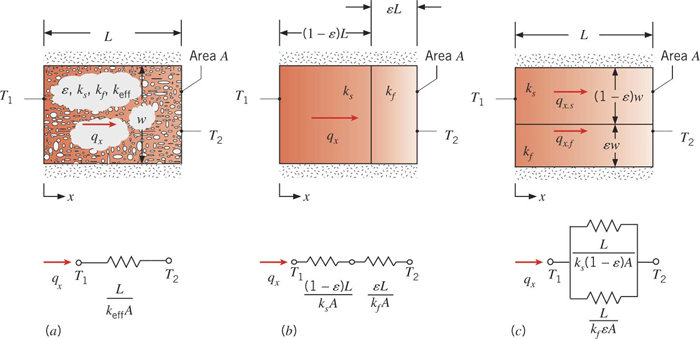

In [12]:
Image(filename='book-figures/fig_03_05.jpg')

In [13]:
!ipython nbconvert --to html ME144-HW1.ipynb --output $assignment_name

[NbConvertApp] Converting notebook ME144-HW1.ipynb to html
[NbConvertApp] Writing 298352 bytes to HW1_ydubief.html
